<a href="https://colab.research.google.com/github/elenakelly/Information-Retrieval-and-Text-Mining/blob/main/Measuring_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start by copying this into your Google Drive!!

Maastricht_University_logo.svg

# Information Retrieval and Text Mining - Tutorial Measuring Quality
Author: Jan Scholtes




Welcome to the tutorial on quantitatively measuring quality in Information Retrieval and Text Mining .

Precision, Recall, F1, and 11-points precision-recall graphs are the most used quantitative measurements in information retrieval for classification problems. In this tutorial we will discuss these using data sets from the Text Retrieval Evaluation Conference (TREC) organized by the US National Institute of Standards (NIST).

The Kappa-Cohen distance is used mostly to measure (dis)agreement between judges on annotated data sets. This is important to identify misunderstandings and forms of human bias on (human) annotated data sets.  

For Topic Modeling and Clustering, we use the RAND index (related to Precision and REcall) and measurements such as the PMI (Pointwise Mutual Information). 

Sumaries use the ROUGE measurement. There are a variety of other measurements used in NLP. We will discuss most of them in the course on ANLP.

In this tutorial we will focus on IR and TM measurements. Mostly Precision, Recall, F1 and 11 points PR. 

Youy can also find more background information in the lecture slides and here: Christopher D. Manning, Prabhakar Raghavan and Hinrich Schütze, Introduction to Information Retrieval, Chapter 8, Evaluation in information retrieval, Cambridge University Press. 2008. 

In [1]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from tqdm import tqdm
import numpy as np


Let's start defining a number of data structures as used in TREC:

- Labels: the list of relevant document ID's for a particular search or classification operation.

- Retrieved: the list with document ID's from all retrieved documents. This includes both relevant and non-relevant documents. Retrieved documents are often ranked on relevance. 

In [2]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In Information Retrieval, the ranking of documents should also be included in the measurement of precision and recall. But let's first look at the unranked situation.

We define the following:



*   True Positive (TP) = number of relevant items identified as relevant
*   True Negative (TN) = number of non-relevant items identified as non-relevant 
*   False Positive (FP) = number of non-relevant items identied as relevant
*   False Negative (FN) = number of relevant items identified as non-relevant

As we discussed in the lecture, precision, recall, F1 and Accuracy can be defined as follows:


$$Precision = \frac{TP}{TP+FP}\quad Recall = \frac{TP}{(TP+FN)} \quad Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \quad F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$ using the variables `tn`, `fp`, `fn`, `tp` above. 


In [3]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

True Positive:  3
False Positive:  3
True Negative:  0
False Negative:  4


We can also measure the number of correct predictions (CP) and Incorrect Predictions (IP):

In [4]:
CP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
       CP+=1
print("Correct Prediction: ", CP) # 3
print(CP == TP + TN) # True
ICP = 0
for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
       ICP+=1
print("Incorrect Prediction: ", ICP)# 7
print(ICP == FP + FN) # True

Correct Prediction:  3
True
Incorrect Prediction:  7
True


Which will allow us to calculate the Accuracy.

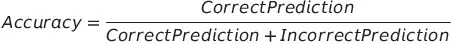

and

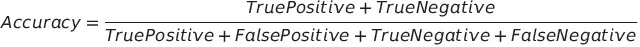

In [5]:
accuracy = (TP + TN)/(TP + FP + TN + FN)
print(accuracy*100) 

30.0


Using the Sklearn libraries, we can make similar calculations.

In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels , predictions)*100)

30.0


As we have seen in the lectures, with unbalanced data sets (small number of relevant items in a large set of unrelevant ones, which is often the case in information retrieval), accuracy can be misleading. 

In [7]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [0 ,0 ,0 ,0 ,0 , 0 ,0 ,0 ,0 ,0]
print(accuracy_score(labels , predictions)*100) # 80

80.0


Let's recalculate TP, TN, FP and FN

In [8]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

True Positive:  0
False Positive:  0
True Negative:  8
False Negative:  2


Looking at Recall gives us and Precision cannot be calculated (div 0):

In [9]:
recall = (TP)/(TP+FN)
print(recall*100)

0.0


But a high recall may also be misleading as precision is reverse-proportional.

In [10]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [1,1,1,1,1,1,1,1,1,1]
print(accuracy_score(labels , predictions)*100)
print(recall_score(labels , predictions)*100)

20.0
100.0


# Exersize 1:

1. Why is accuracy not a good measurement in information retrieval and text-mining?



Accuracy is not a good measurement in information retrieval and text-mining because it does not take into account the imbalance between relevant and non-relevant items in the dataset. In many cases, the number of non-relevant items can be much larger than the number of relevant items, and therefore a high accuracy score can be achieved by simply predicting all items as non-relevant. This can lead to a misleading evaluation of the model's performance.


2. Why do we need to look at the combination of precision and recall?

We need to look at the combination of precision and recall because they represent different aspects of the model's performance. Precision measures the fraction of relevant items among the items predicted as relevant, while recall measures the fraction of relevant items that were correctly identified by the model. In other words, precision is a measure of how "precise" the model's predictions are, while recall is a measure of how "complete" the model's predictions are. By looking at both precision and recall, we can get a more balanced view of the model's performance. The trade-off between precision and recall can be visualized using a precision-recall curve, which can help us to choose an appropriate threshold for the model's predictions.

This is why we also look at F1 scores and 11 points precision recall graphs. These provide a more balanced view. 

In [21]:
from sklearn.metrics import f1_score
print(f1_score(labels, predictions))

0.5


# Exersize 2:



1. Can you calculate the F2 score or the F0.5 score?

Yes, we can calculate the F2 score or the F0.5 score using the formula:

F2 score = (1 + 2^2) * (precision * recall) / (2^2 * precision + recall)

F0.5 score = (1 + 0.5^2) * (precision * recall) / (0.5^2 * precision + recall)

2. Which one prevails recall and which one prevails precision

F2 score prevails recall, while F0.5 score prevails precision. 


3. What would a lawyer be mostly interested in: F1, F2 or F0.5?

A lawyer might be mostly interested in precision as it is important to make sure that the selected documents are relevant to the case, while recall is also important to ensure that all relevant documents are included. However, the specific choice between F1, F2, or F0.5 will depend on the lawyer's priorities and the specific requirements of the case. 




4. How about a consumer using Google to find a good hotel in Maastricht?

A consumer using Google to find a good hotel in Maastricht might be mostly interested in recall, as they want to make sure they don't miss out on any good options, but precision is also important to avoid wasting time looking at irrelevant or unsuitable options. Again, the specific choice between F1, F2, or F0.5 will depend on the consumer's priorities and the specific requirements of their search.


How about Confusion Matrices? A confusion matrix is a matrix to represent the number of True Positives, False Positives, True Negatives, and False Negatives

In [12]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels, predictions)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

Plot as bar graph

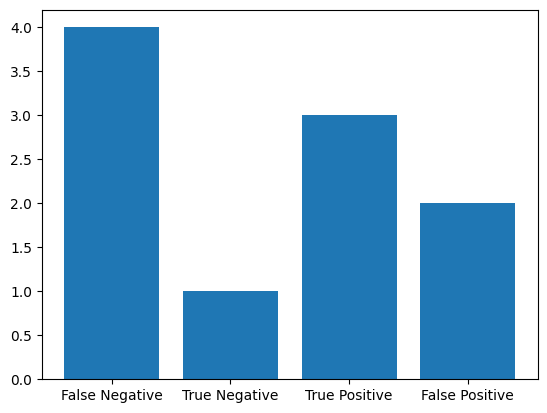

In [14]:
import matplotlib.pyplot as plt
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

Plot as heatmap

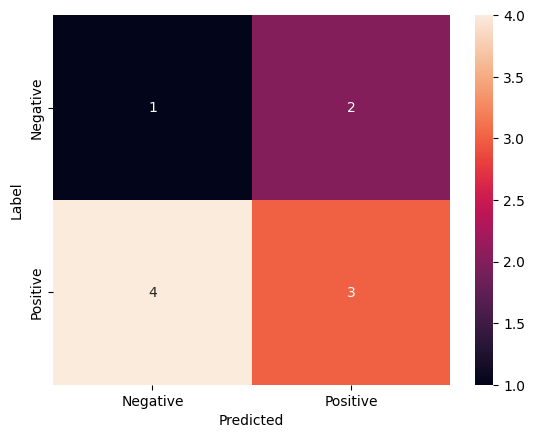

In [15]:
import seaborn as sns
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

Display as Matrix

In [16]:
import pandas as pd
data = {'Labels' : labels, 'Predictions': predictions}
df = pd.DataFrame(data, columns=['Labels','Predictions'])
confusion_matrix = pd.crosstab(df['Labels'], df['Predictions'], rownames=['Labels'], colnames=['Predictions'])
print (confusion_matrix)

Predictions  0  1
Labels           
0            1  2
1            4  3


Or display as Classification Report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(labels,predictions))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.60      0.43      0.50         7

    accuracy                           0.40        10
   macro avg       0.40      0.38      0.38        10
weighted avg       0.48      0.40      0.42        10



or a precision recall graph:

In [18]:
from sklearn.metrics import precision_recall_curve
print(precision_recall_curve(labels,predictions))

(array([0.7, 0.6, 1. ]), array([1.        , 0.42857143, 0.        ]), array([0, 1]))


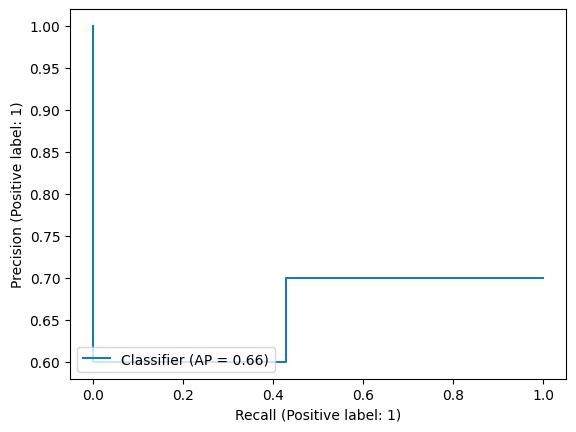

In [19]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt 
PrecisionRecallDisplay.from_predictions(labels, predictions)

Now this is a pretty bad score. For better classifiers, the graph should be as much as possible in the upper right corner and above 80% precision and recall for all data points. 

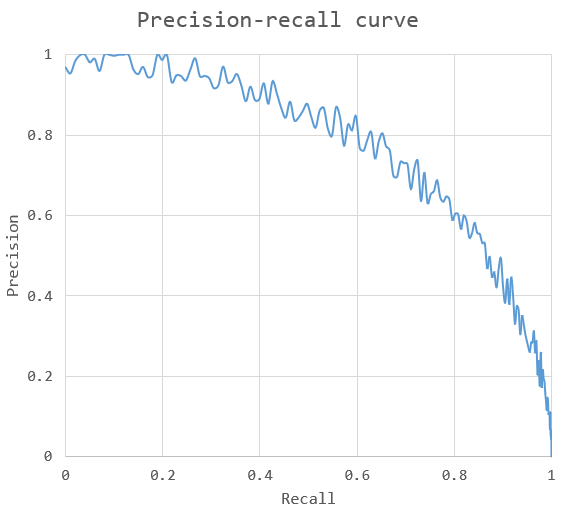

# The Kappa Cohen Distance

Cohen's kappa coefficient (κ, lowercase Greek kappa) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. 

Although there is controversie about this measure, it is a good first start. If the Kappa-Cohen distance is not good, you should be concerned. If it is good, there arfe more detailed analysis to do further investigations towards label disagreement in data sets. 

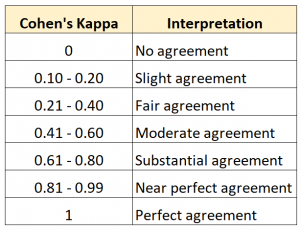

In [20]:
from sklearn.metrics import cohen_kappa_score

#define array of ratings for both raters
rater1 = [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
rater2 = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]

#calculate Cohen's Kappa
cohen_kappa_score(rater1, rater2)

0.33628318584070793

So, obviously, this is not a good data set. One can best discuss the annotations for which the judges had disagreement with the judges to see if there is any misunderstanding or bias involved in their decisions.  

#Submission
Please share your Colab notebook by clicking File on the top-left corner. Click under Download on Download .ipynb and upload that file to Canvas.